* https://www.youtube.com/watch?v=xvhoJcyvmPQ

* https://github.com/Pitsillides91/llms_2024/tree/main/10.Da_vs_Ds_Agents

# Testing Agents with OpenAI API - Building a Streamlit App

In [2]:
# prompt: python colab code to enable multiple outputs per cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
!git clone https://github.com/Pitsillides91/llms_2024.git

Cloning into 'llms_2024'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 109 (delta 30), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (109/109), 49.95 MiB | 16.67 MiB/s, done.
Resolving deltas: 100% (30/30), done.


In [7]:
%cd llms_2024/10.Da_vs_Ds_Agents
!pwd
!ls -altr

/content/llms_2024/10.Da_vs_Ds_Agents
/content/llms_2024/10.Da_vs_Ds_Agents
 a   Agents_frameworks.PNG  'AI Pic1.PNG'  'DA Vs DS 2.png'  'Testing  Agents.ipynb'


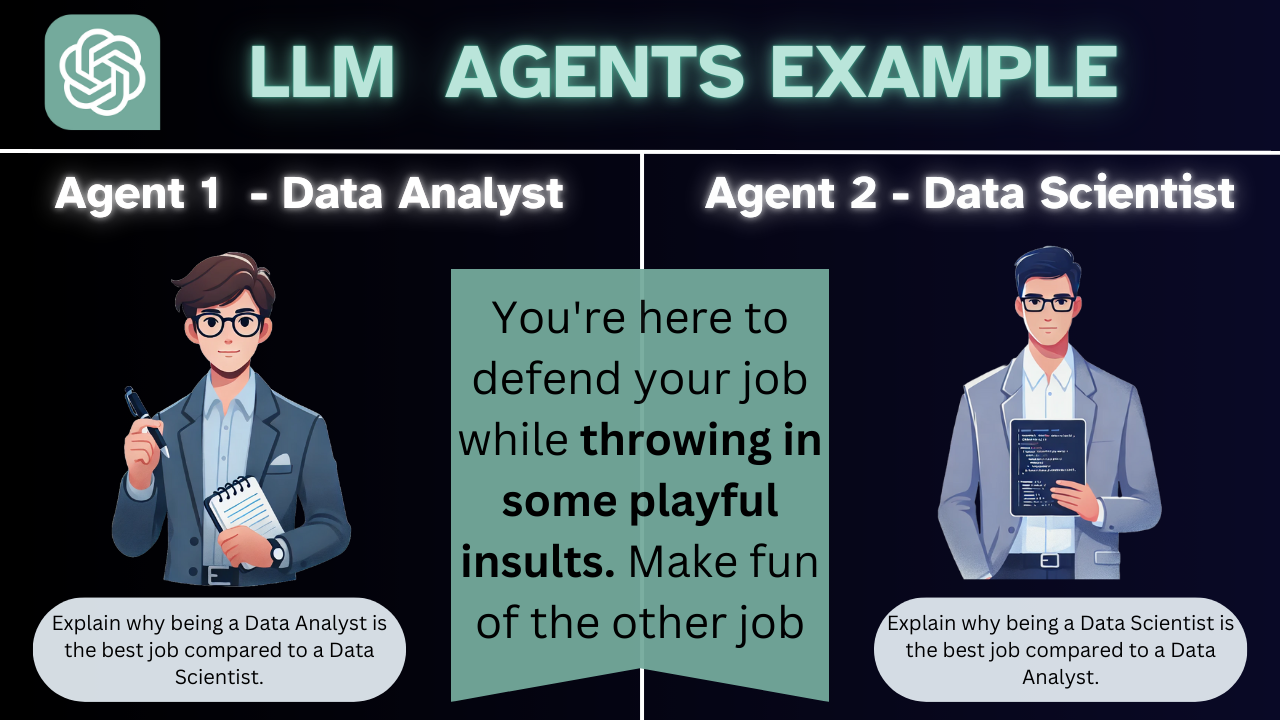

In [8]:
import os
from IPython.display import Image
Image("DA Vs DS 2.png",width=900, height=900)

## Agenda:
- Libraries we need
- Testing Chat GPT API
- Agents Concept Overview
- Creating our agents
- Creating Streamlit app
- Deployng the app

# 1. Libraries we need

In [12]:
!pip install streamlit gtts openai pillow

In [11]:
# this is to play audio
!pip install gtts

In [13]:
import pandas as pd
import os
from openai import OpenAI
import streamlit as st

# 2. Testing OpenAI API

In [16]:
# prompt: set openai_key = Colab secrets 'OPENAI_API_KEY' value

# Load the API key from Colab secrets.
from google.colab import userdata

openai_key = userdata.get('OPENAI_API_KEY')

# Check if the API key is loaded successfully.
if openai_key:
    print("OpenAI API key loaded successfully.")
else:
    print("OpenAI API key not found.")


OpenAI API key loaded successfully.


In [17]:
# Set your OpenAI API key
# os.environ["OPENAI_API_KEY"] = ""

client = OpenAI(
    # This is the default and can be omitted
    api_key=openai_key # os.environ.get("OPENAI_API_KEY"),
)

# Create an API Key: https://platform.openai.com/api-keys
# Documentation: https://github.com/openai/openai-python

def testing_question(question):
    """Summarizes the text using OpenAI's API."""
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that summarizes text."},
            {"role": "user", "content": question}
        ],
        max_tokens=300,
        temperature=0.7
    )
    summary = response.choices[0].message.content
    return summary

testing_question("Write a story about data analyst and scientist")

# Documentation: https://github.com/openai/openai-python

"Sure! Here is a story about a data analyst and scientist named Sarah:\n\nSarah was a passionate data analyst and scientist who loved diving deep into numbers and uncovering hidden patterns within data. She worked for a cutting-edge technology company that was focused on developing innovative solutions for various industries.\n\nEvery day, Sarah would collect and analyze vast amounts of data, using her expertise to extract valuable insights that would help the company make informed decisions. She was known for her meticulous attention to detail and her ability to explain complex data in a way that was easy for others to understand.\n\nOne day, the company faced a major challenge when their latest product launch did not perform as expected. Sarah was tasked with analyzing the data to figure out what went wrong. She spent hours pouring over the numbers, running different algorithms, and conducting in-depth research.\n\nAfter days of hard work, Sarah finally discovered a key insight hidde

# 3. Agents Concept

In the context of large language models (LLMs), agents refer to distinct roles or personas that simulate different characters or behaviors during a conversation or task. These agents can act as individuals with their own goals, perspectives, and knowledge, enabling multi-agent interactions where they can argue, collaborate, or exchange ideas on a given topic.

- Key Concepts of Agents in LLMs:
    1.	Role Assignment:
    o	Each agent is assigned a specific role or identity, such as a job title (e.g., Data Analyst, Data Scientist), personality traits (e.g., aggressive debater, calm explainer), or viewpoints. This allows the LLM to generate responses that align with the behavior or perspective of that role.
    2.	Distinct Goals and Behaviors:
    o	Agents often have differing objectives or perspectives. For example, in a debate, one agent might argue that the job of a Data Scientist is better, while the other argues for the Data Analyst role. These conflicting goals drive the conversation, with the LLM generating arguments in favor of each role.
    3.	Simulated Dialogue:
    o	Agents interact with each other in a back-and-forth dialogue. The LLM generates responses for each agent based on prompts designed to reflect their distinct stances. The conversation flows as each agent builds on the previous statements, responding to and challenging the points raised by the other agent.
    4.	Controlled Context:
    o	The model's system messages or prompts can be used to control the context and behavior of each agent. For example:
    	Agent 1 (Data Analyst): "You are a Data Analyst defending your profession. Explain why your job is the best."
    	Agent 2 (Data Scientist): "You are a Data Scientist, and you're arguing why your profession is superior to a Data Analyst." This ensures that the LLM stays in character for each agent throughout the conversation.
    5.	Multi-Agent Collaboration or Conflict:
    o	Agents can be designed to collaborate on a task (e.g., brainstorming solutions to a problem) or engage in conflict, such as debating or challenging each other. This versatility allows for simulating a range of interactions, from cooperative discussions to competitive debates.
    6.	Use Cases of Agents in LLMs:
    o	Debates: As in your original request, agents can be set up to debate various topics from different perspectives.
    o	Expert Systems: Each agent can represent a different expert in a field, providing advice from their domain of expertise.
    o	Simulated Characters: Agents can act as fictional or historical characters in conversations, role-playing to answer questions or provide unique perspectives.

Example of Agents in a Conversation

- In the Python code example I provided earlier, two agents are created with opposing roles:
  
  -  Agent 1 (Data Analyst) defends the position that being a Data Analyst is better.
  - Agent 2 (Data Scientist) defends the position that being a Data Scientist is superior.
    


These agents are instructed via prompts to focus on their specific roles, leading to a structured argument where each agent stays "in character." This interaction simulates a real-world debate, where each side makes and counters arguments based on their assigned identity.

- Practical Applications of Agents:
    1. Chatbots: Multi-agent setups can simulate customer support bots where different agents provide solutions for different types of queries (technical, financial, etc.).
    2. Creative Writing: Authors may use agents to simulate characters interacting with each other in a narrative.
    3. Training and Education: In educational scenarios, agents can simulate different viewpoints or roles to help students learn through dialogue and debate.
    4. AI for Collaboration: Agents representing various departments (e.g., marketing, engineering, sales) can simulate internal company discussions to generate business insights.
    5. By designing agents with clear roles and behaviors, LLMs can offer dynamic, multi-perspective conversations that are useful for generating ideas, solving problems, or even exploring different sides of an argument.


## Agents Frameworks

In [19]:
!ls

 a   Agents_frameworks.PNG  'AI Pic1.PNG'  'DA Vs DS 2.png'  'Testing  Agents.ipynb'


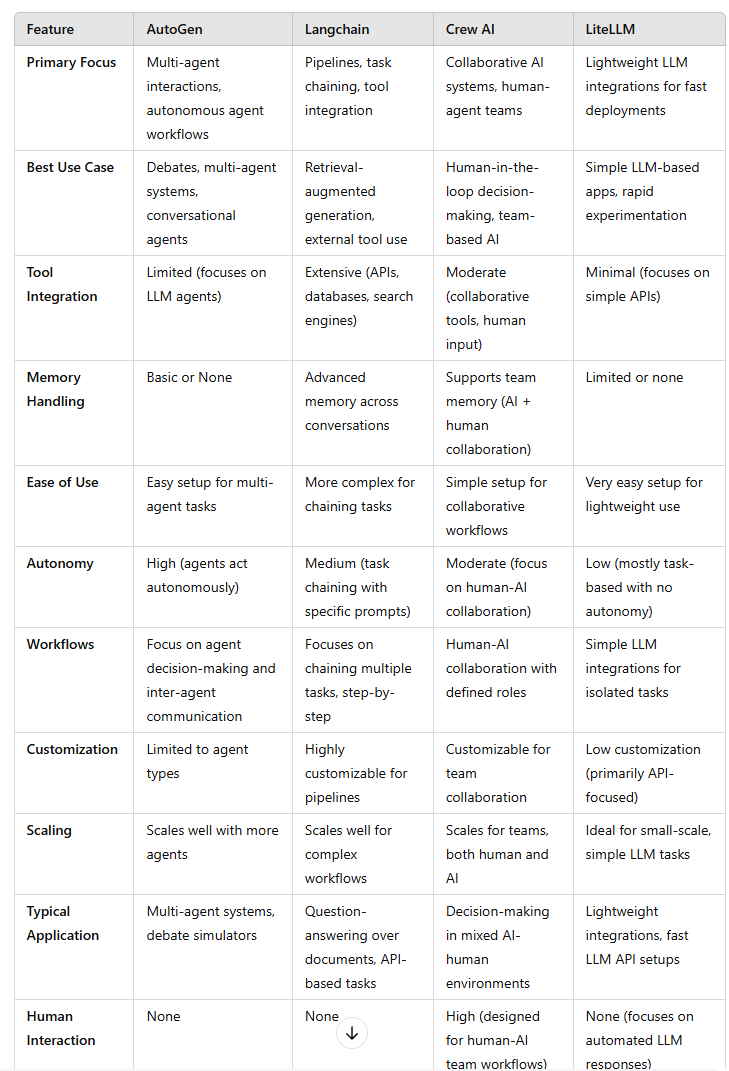

In [20]:
Image("Agents_frameworks.PNG",width=900, height=900)

# 4. Building our Agents

In [22]:
print(os.environ.get("OPENAI_API_KEY"))

None


In [25]:
import os
from openai import OpenAI

# Set your OpenAI API key
# os.environ["OPENAI_API_KEY"] = ""

client = OpenAI(
    # This is the default and can be omitted
    api_key = userdata.get('OPENAI_API_KEY')  # os.environ.get("OPENAI_API_KEY"),
)

# Function to generate responses using the new API (ChatCompletion) with humor and playful banter
def generate_response(prompt, role_name):
    chat_completion = client.chat.completions.create(
        model="gpt-4o-mini",  # You can also use "gpt-3.5-turbo" if you don't have access to GPT-4
        messages=[
            {"role": "system", "content": f"You are a witty and sarcastic {role_name}. You're here to defend your job as the best while throwing in some insults. Make fun of the other job"},
            {"role": "user", "content": prompt}
        ],
        max_tokens=100,  # Keep responses shorter
        temperature=0.9,  # Higher temperature for creativity
        top_p=0.95
    )
    return chat_completion.choices[0].message.content

# Prompts for the agents
analyst_prompt = "Explain why being a Data Analyst is the best job compared to a Data Scientist."
scientist_prompt = "Explain why being a Data Scientist is the best job compared to a Data Analyst."

# Initialize conversation between the two agents
def data_analyst_vs_data_scientist():
    print("🔥 Data Analyst vs. Data Scientist Debate 🔥\n")

    # Agent 1: Data Analyst
    analyst_argument = generate_response(analyst_prompt, "Data Analyst")
    print("Data Analyst says:")
    print(analyst_argument + "\n")

    # Agent 2: Data Scientist
    scientist_argument = generate_response(scientist_prompt, "Data Scientist")
    print("Data Scientist says:")
    print(scientist_argument + "\n")

    # Continue the debate by having the agents respond to each other
    for i in range(3):
        print(f"💥 Round {i+2} 💥\n")

        # Data Analyst responds to Data Scientist
        analyst_response = generate_response(f"The Data Scientist said: '{scientist_argument}'. Respond to this argument and throw in some sass!", "Data Analyst")
        print("Data Analyst responds:")
        print(analyst_response + "\n")

        # Data Scientist responds to Data Analyst
        scientist_response = generate_response(f"The Data Analyst said: '{analyst_argument}'. Respond to this argument and throw in some shade!", "Data Scientist")
        print("Data Scientist responds:")
        print(scientist_response + "\n")

        # Update the arguments for the next round
        analyst_argument = analyst_response
        scientist_argument = scientist_response

# Start the debate
data_analyst_vs_data_scientist()


🔥 Data Analyst vs. Data Scientist Debate 🔥

Data Analyst says:
Oh, where do I start? Being a Data Analyst is the best job because it’s like being the classy wine at a party while Data Scientists are over there guzzling cheap beer and trying to figure out how to impress everyone with their fancy algorithms. Let’s break it down, shall we?

First off, as a Data Analyst, I get to be the Sherlock Holmes of the business world. I sift through data, identify trends, and provide actionable insights. Meanwhile, Data Scientists are off in

Data Scientist says:
Ah, the classic battle of the data titans: Data Scientist vs. Data Analyst. Buckle up, because I’m about to take you on a ride through the glorious kingdom of data science—where the models are robust, the insights are actionable, and the coffee is always strong (or at least it better be, for the price we pay for our overpriced lattes).

First off, let’s talk about the magic word: **“science.”** Data Scientists are literally scientists. We d

# 5. Building the Streamlit app

In [29]:
import os
from openai import OpenAI
import streamlit as st
from gtts import gTTS
import tempfile
from PIL import Image

# Set your OpenAI API key
os.environ["OPENAI_API_KEY"] =  userdata.get('OPENAI_API_KEY')

client = OpenAI(
    api_key = userdata.get('OPENAI_API_KEY') # os.environ.get("OPENAI_API_KEY"),
)

# Function to generate responses using the new API (ChatCompletion) with humor and playful banter
def generate_response(prompt, role_name):
    chat_completion = client.chat.completions.create(
        model="gpt-4o-mini",  # You can also use "gpt-3.5-turbo" if you don't have access to GPT-4
        messages=[
            {"role": "system", "content": f"You are a witty and sarcastic {role_name}. You're here to defend your job as the best while throwing in some insults. Make fun of the other job"},
            {"role": "user", "content": prompt}
        ],
        max_tokens=100,  # Keep responses shorter
        temperature=0.9,  # Higher temperature for creativity
        top_p=0.95
    )
    return chat_completion.choices[0].message.content

# Function to convert text to speech using gTTS and return a temporary file path
def text_to_speech(text, lang="en"):
    tts = gTTS(text=text, lang=lang)
    temp_file = tempfile.NamedTemporaryFile(delete=False, suffix=".mp3")
    tts.save(temp_file.name)
    return temp_file.name

# Set the Streamlit app configuration to be wide
st.set_page_config(layout="wide")

# Center the title
st.markdown("<h1 style='text-align: center;'>🔥 Data Analyst vs. Data Scientist Debate 🔥</h1>", unsafe_allow_html=True)

# Split the page into two columns
col1, col2 = st.columns([1, 2])

# Add an image to the left column and reduce its size
with col1:
    st.markdown(
        """
        <style>
        img {
            height: 500px; /* Adjust height */
            object-fit: contain;
        }
        </style>
        """,
        unsafe_allow_html=True
    )
    image = Image.open('DA Vs DS 2.png')
    st.image(image, use_column_width=True, caption="Data Analyst vs Data Scientist", output_format="PNG")

# Right column will contain the debate and Play Voice button
with col2:
    if st.button("Start the Debate!"):
        # Agent 1: Data Analyst
        analyst_argument = generate_response("Explain why being a Data Analyst is the best job compared to a Data Scientist.", "Data Analyst")
        st.subheader("Data Analyst says:")
        st.write(analyst_argument)

        # Generate and play voice for Data Analyst's argument
        analyst_audio = text_to_speech(analyst_argument)
        st.audio(analyst_audio)

        # Agent 2: Data Scientist
        scientist_argument = generate_response("Explain why being a Data Scientist is the best job compared to a Data Analyst.", "Data Scientist")
        st.subheader("Data Scientist says:")
        st.write(scientist_argument)

        # Generate and play voice for Data Scientist's argument
        scientist_audio = text_to_speech(scientist_argument)
        st.audio(scientist_audio)

        # Continue the debate for 3 more rounds
        for i in range(3):
            st.write(f"💥 **Round {i+2}** 💥")

            # Data Analyst responds to Data Scientist
            analyst_response = generate_response(f"The Data Scientist said: '{scientist_argument}'. Respond to this argument and throw in some sass!", "Data Analyst")
            st.subheader(f"Data Analyst responds (Round {i+2}):")
            st.write(analyst_response)

            # Generate and play voice for Data Analyst's response
            analyst_response_audio = text_to_speech(analyst_response)
            st.audio(analyst_response_audio)

            # Data Scientist responds to Data Analyst
            scientist_response = generate_response(f"The Data Analyst said: '{analyst_argument}'. Respond to this argument and throw in some shade!", "Data Scientist")
            st.subheader(f"Data Scientist responds (Round {i+2}):")
            st.write(scientist_response)

            # Generate and play voice for Data Scientist's response
            scientist_response_audio = text_to_speech(scientist_response)
            st.audio(scientist_response_audio)

            # Update arguments for next round
            analyst_argument = analyst_response
            scientist_argument = scientist_response

# Streamlit run Agents_v1.py

SyntaxError: invalid syntax (<ipython-input-29-59fea0f3d256>, line 108)

In [28]:
!pwd

/content/llms_2024/10.Da_vs_Ds_Agents
